In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import scipy.stats as scipy 
import os
from google.colab import drive
from google.colab import files
import glob
import matplotlib.pyplot as plt
from datetime import datetime

path="/content/drive/My Drive/Datos_Brutos"

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
df=pd.DataFrame()
s=0
l=[]
for i in glob.glob(path+"/DataFrames/*.csv"):
    df1=pd.read_csv(i)
    l.append(df1)
    df=pd.concat([df,df1],axis=0)
    s+=df1.shape[0]

df.reset_index(inplace=True)
df.drop("index",axis=1,inplace=True)

duplicados=df.loc[df.duplicated(subset="Date"),:]
df.drop_duplicates(subset="Date",inplace=True)

to_drop=['Bar Trend', 'Next Record',
       'Inside Temperature', 'Inside Humidity',
       '10 Min Avg Wind Speed', 'Extra Temperatures', 'Soil Temperatures', 'Leaf Temperatures',
       'Extra Humidties', 'Storm Rain', 'Start Date of current Storm',
       'Month Rain', 'Year Rain', 'Day ET', 'Month ET', 'Year ET',
       'Soil Moistures', 'Leaf Wetnesses', 'Inside Alarms', 'Rain Alarms',
       'Outside Alarms', 'Extra Temp/Hum Alarms', 'Soil & Leaf Alarms',
       'Transmitter Battery Status', 'Console Battery Voltage',
       'Forecast Icons', 'Forecast Rule number', 'Time of Sunrise',
       'Time of Sunset', '<LF> = 0x0A', '<CR> = 0x0D', 'CRC']

dfori=pd.read_csv(path+"/DatosEstacion2021-11-06.csv")


In [3]:
df["Dia"]=df["Date"].str.split("/",expand=True)[0]
df["Mes"]=df["Date"].str.split("/",expand=True)[1]
df["Ano"]=df["Date"].str.split("/",expand=True)[2].str.split(" ",expand=True)[0]
df["Hora"]=df["Date"].str.split("/",expand=True)[2].str.split(" ",expand=True)[1]
df["Ano"]=df["Ano"].astype(int)+2000
df["Ano"]=df["Ano"].astype(str)
df["Mesano"]=df["Mes"]+"-"+df["Ano"]

In [4]:
df["Date"]=df["Dia"]+"/"+df["Mes"]+"/"+df["Ano"]+" "+df["Hora"] #16/06/2019 - 22/07/2021 DD/MM/YYYY Fechas del DF
df["Date"]=pd.to_datetime(df["Date"], format="%d/%m/%Y %H:%M") #98867

In [5]:
dft=pd.DataFrame()
dft["Date"]=pd.date_range(start="2019-06-1 00:00",end="2021-07-31 12:55", freq="5min") #

In [6]:
df.set_index("Date",inplace=True)
dft.set_index("Date",inplace=True)

In [7]:
dff=pd.merge(dft,df,how="outer",left_index=True,right_index=True)
dff.sort_index(ascending=True,inplace=True)
df.sort_index(ascending=True,inplace=True)

DATES DF

16/06/2019 - 22/07/2021 DD/MM/YYYY

In [8]:
def grafica(limite1,limite2,ejex,ejey,titulo,variable): #YYYY-MM-DD HH:MM:SS
    ax=plt.figure(figsize=(20,10))
    plt.plot(ejex,ejey,linewidth=1,color="Teal", linestyle=":")
    plt.grid(":", alpha=0.6) 
    plt.xlim(pd.to_datetime(limite1, format="%Y-%m-%d %H:%M"),pd.to_datetime(limite2, format="%Y-%m-%d %H:%M"))
    plt.title(titulo, size=16)
    plt.ylabel(variable, size=14, style="italic")
    plt.xlabel("Fecha", size=14,style="italic")
    plt.show()


In [9]:
df.rename({"Out Temp":"Outside Temperature","Hum Out":"Outside Humidity",
           "Pt. Dew":"Dew Point","Speed Wind":"Wind Speed","Bar   ":
           "Barometer","Rain ":"Day Rain","Rad. Solar":"Solar Radiation",
           "Rate Rain":"Rain Rate", "Index UV ":"UV", "Temp In ":"Inside Temperature",
           "Hum In":"Inside Humidity","ET  ":"ET","Dir Wind.1":"Wind Direction"},axis=1, inplace=True)
dff.rename({"Out Temp":"Outside Temperature","Hum Out":"Outside Humidity",
           "Pt. Dew":"Dew Point","Speed Wind":"Wind Speed","Bar   ":
           "Barometer","Rain ":"Day Rain","Rad. Solar":"Solar Radiation",
           "Rate Rain":"Rain Rate", "Index UV ":"UV", "Temp In ":"Inside Temperature",
           "Hum In":"Inside Humidity","ET  ":"ET","Dir Wind.1":"Wind Direction"},axis=1, inplace=True)


In [10]:
df['Rain Rate'] = df['Rain Rate']*0.2/10. #cm/h
dff['Rain Rate'] = dff['Rain Rate']*0.2/10.

In [11]:
dff["Wind Direction"].replace("---",np.NaN,inplace=True)
df["Wind Direction"].replace("---",np.NaN,inplace=True)
dff["Tiempo Sistema"]=dff.index
df["Tiempo Sistema"]=df.index

In [12]:
wind={"N":360,"NNE":22.5,"NE":45,"ENE":67.5,"E":90,"ESE":112.5,"SE":135,"SSE":157.5,"S":180,"SSW":202.5,"SW":225,"WSW":247.5,"W":279,"WNW":282.5,
      "NW":315,"NNW":337.5}
for i in wind.keys():
    df["Wind Direction"].replace(i,wind[i],inplace=True)
    dff["Wind Direction"].replace(i,wind[i],inplace=True)



In [13]:
df=df[["Tiempo Sistema","Outside Temperature","Barometer","Day Rain","Rain Rate","UV","Solar Radiation","Wind Speed","Outside Humidity","Wind Direction"]]
dff=dff[["Tiempo Sistema","Outside Temperature","Barometer","Day Rain","Rain Rate","UV","Solar Radiation","Wind Speed","Outside Humidity","Wind Direction"]]


In [14]:
for i in dff.columns:
    pd.to_numeric(dff[i])
dff["Barometer"]=dff["Barometer"].apply(lambda x: x if x>1000 else np.NaN)
df["Barometer"]=df["Barometer"].apply(lambda x: x if x>1000 else np.NaN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


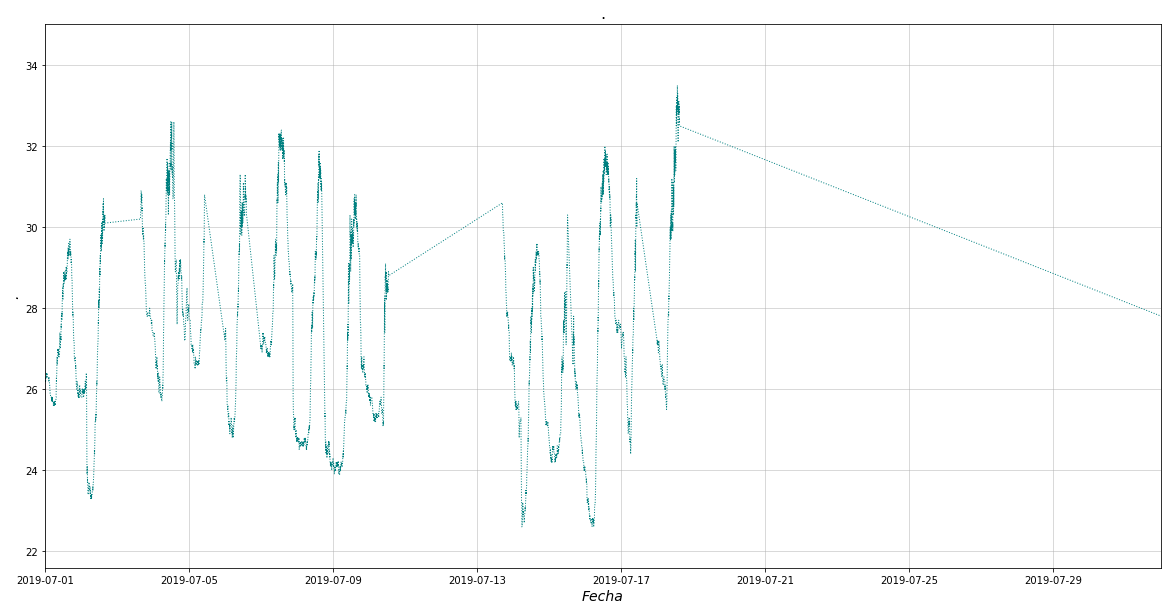

In [15]:
grafica("2019-07-01 00:00","2019-07-31 23:59",df.index,df["Outside Temperature"],".",".")

In [16]:
df[["Tiempo Sistema","Outside Temperature","Barometer","Day Rain","Rain Rate","UV","Solar Radiation","Wind Speed","Outside Humidity","Wind Direction"]].to_csv(path+"/DataFrames/DF 2019-2021/2019_2021nona.csv",index=False)
dff[["Tiempo Sistema","Outside Temperature","Barometer","Day Rain","Rain Rate","UV","Solar Radiation","Wind Speed","Outside Humidity","Wind Direction"]].to_csv(path+"/DataFrames/DF 2019-2021/2019_2021.csv",index=False)

### DATOS FALTANTES


In [17]:
dff["Mes"]=dff.index.month
dff["Ano"]=dff.index.year
dff["Ano-Mes"]=dff["Ano"].astype(str)+"-"+dff["Mes"].astype(str)
fechas=dff["Ano-Mes"].drop_duplicates().values
l=["Outside Temperature","Barometer","Day Rain","Rain Rate","UV","Solar Radiation","Wind Speed","Outside Humidity","Wind Direction"]
datfal=pd.DataFrame(index=fechas)


In [18]:
for i in l:
    datfal[i]=round((dff[i].isna().groupby(dff["Ano-Mes"]).sum()/(dff[i].isna().groupby(dff["Ano-Mes"]).sum()+dff[i].notna().groupby(dff["Ano-Mes"]).sum()))*100,2)
datfal.reset_index(inplace=True)


In [19]:
datfal.to_csv(path+"/DataFrames/DF 2019-2021/dfmissing_2.csv",index=False)

In [20]:
datosfaltantes=dff
datosfaltantes["Minutos"]=datosfaltantes.index.minute
datosfaltantes["Day"]=datosfaltantes.index.day
datosfaltantes=datosfaltantes[datosfaltantes["Minutos"].isin(np.arange(0,60,5))]
datosfaltantes["Hora"]=datosfaltantes.index.hour
datosfaltantes=datosfaltantes.set_index(["Ano-Mes","Day","Hora"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
dfhm=datosfaltantes[l]
dfhm=dfhm.groupby(level=[0,1,2]).count()/(dfhm.groupby(level=[0,1,2]).count()+dfhm.isna().groupby(level=[0,1,2]).sum())
# dfhm.reset_index(inplace=True)

for i in l:
    dfhm.loc[(dfhm[i]>=0.745),i]=1
    dfhm.loc[(dfhm[i]<0.745),i]=np.NaN
# dfhm.reset_index(inplace=True)
dfhmf=dfhm.groupby(level=[0]).count()/(dfhm.groupby(level=[0]).count()+dfhm.isna().groupby(level=[0]).sum())
dfhmf=(dfhmf*100).round(2)
dfhmf.reset_index(inplace=True)
dfhmf["Ano-Mes"]=pd.to_datetime(dfhmf["Ano-Mes"], format="%Y-%m")
dfhmf.sort_values(by="Ano-Mes",ascending=True,inplace=True)
dfhmf["Ano-Mes"]=dfhmf["Ano-Mes"].apply(lambda x: x.strftime("%Y-%b"))
dfhmf.to_csv(path+"/DataFrames/DF 2019-2021/datosqhay_horas_mes.csv",index=False)

In [22]:
dfdm=datosfaltantes[l]
dfdm=dfdm.groupby(level=[0,1,2]).count()/(dfdm.groupby(level=[0,1,2]).count()+dfdm.isna().groupby(level=[0,1,2]).sum())
for i in l:
    dfdm.loc[(dfdm[i]>=0.745),i]=1
    dfdm.loc[(dfdm[i]<0.745),i]=np.NaN
dfdmf=dfdm.groupby(level=[0,1]).count()/(dfdm.groupby(level=[0,1]).count()+dfdm.isna().groupby(level=[0,1]).sum())
for i in l:
    dfdmf.loc[(dfdmf[i]>=0.745),i]=1
    dfdmf.loc[(dfdmf[i]<0.745),i]=np.NaN
dfdmff=dfdmf.groupby(level=[0]).count()/(dfdmf.groupby(level=[0]).count()+dfdmf.isna().groupby(level=[0]).sum())
dfdmff.index=pd.to_datetime(dfdmff.index, format="%Y-%m")
dfdmff.sort_values(by="Ano-Mes",ascending=True,inplace=True)
dfdmff=(dfdmff*100).round(2)
dfdmff=dfdmff.reset_index()
dfdmff["Ano-Mes"]=dfdmff["Ano-Mes"].apply(lambda x: x.strftime("%Y-%b"))
dfdmff.to_csv(path+"/DataFrames/DF 2019-2021/datoqhay_dia_mes.csv",index=False)